---
## Fetal Health Classification Problem
---
### Aurthor: Avinash Bagul
##### MSc Artificial Intelligence (University of Aberdeen)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Checking for number of missing values in each column.....

AxesSubplot(0.125,0.125;0.775x0.755)


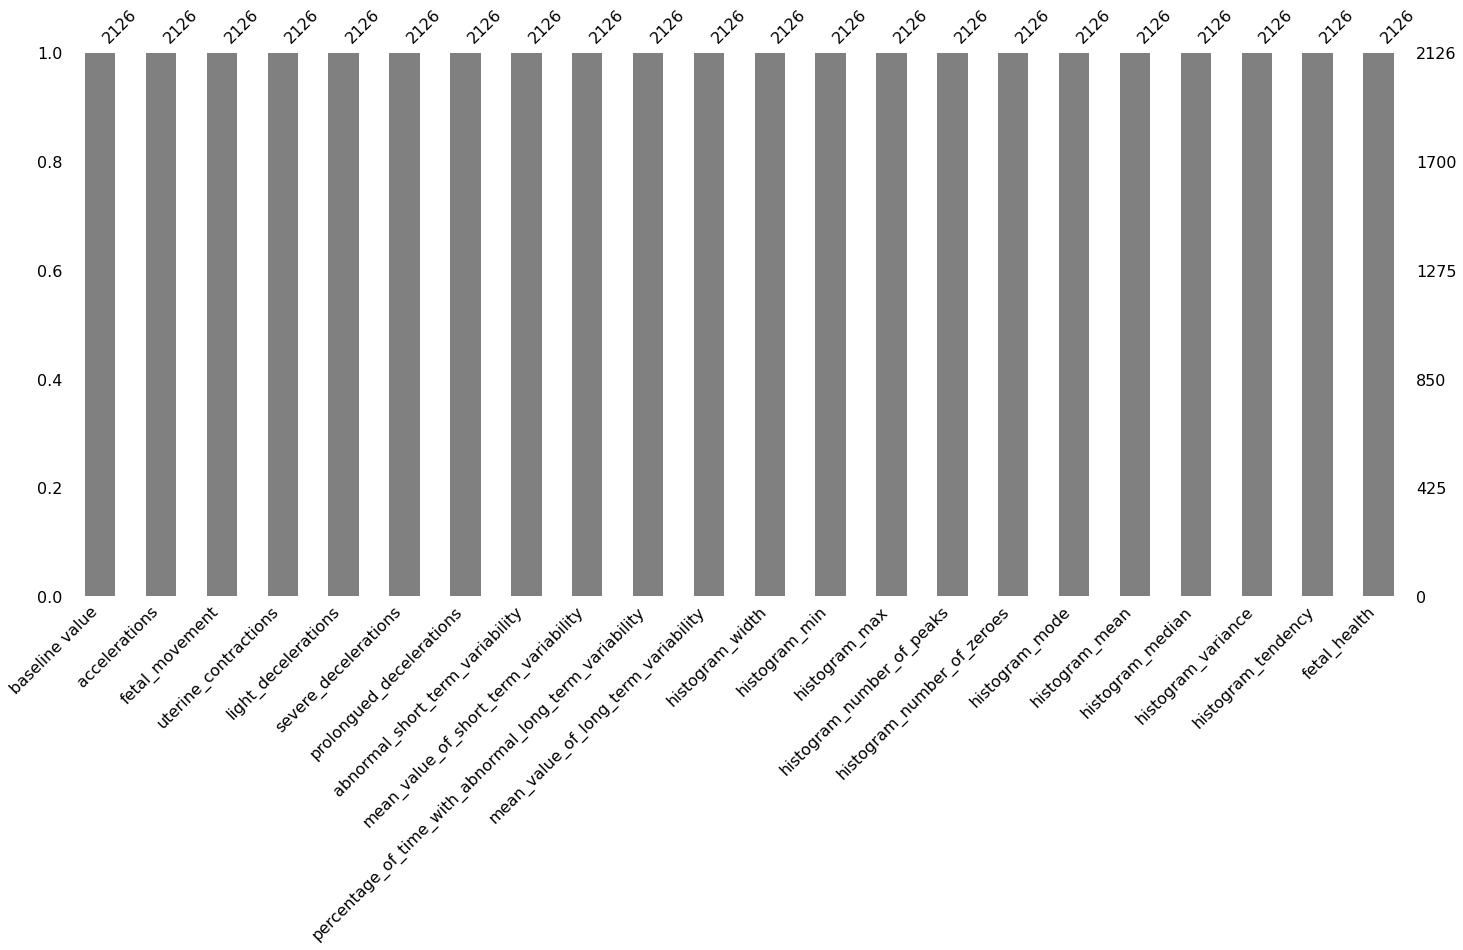

In [4]:
import missingno as msno
n = msno.bar(df,color="gray")
print(n)

Description of the Data

In [5]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Distribution of Target class: Highly imbalanced

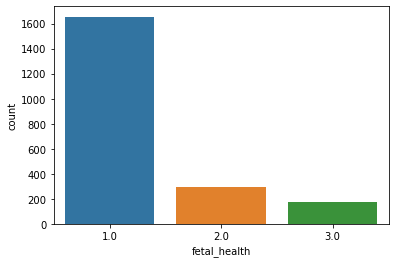

In [7]:
sns.countplot(x="fetal_health",data = df)
plt.show()

Looking for outliers in the data

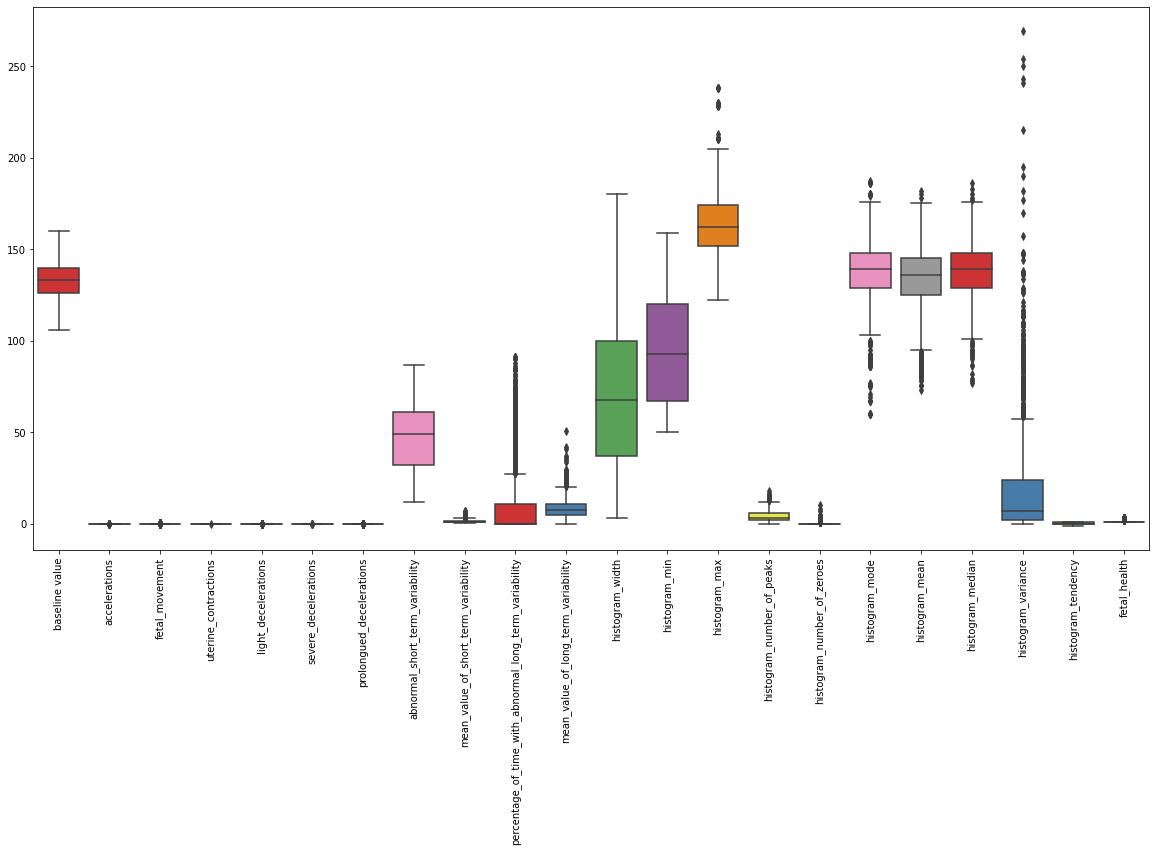

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(data = df,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

Removing the outliers: by setting upper and lower threshold

In [9]:
# Function to set upper and lower bound to 3rd standard deviation and remove outliers

def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()

    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************')
    
    df = df1.copy()

    return df

Removing outliers from columns showing outiers in the boxplot visualized above

In [10]:
df = removeOutlier(df.histogram_variance, df)
df = removeOutlier(df.histogram_median, df)
df = removeOutlier(df.histogram_mean, df)
df = removeOutlier(df.histogram_mode, df)
df = removeOutlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = removeOutlier(df.mean_value_of_short_term_variability, df)

lowerbound:  -68.12481771467543  -------- upperbound:  105.74099833555971
44  number of outliers from  2126
 ******************************************************
lowerbound:  96.21293175778905  -------- upperbound:  180.71886459187473
17  number of outliers from  2082
 ******************************************************
lowerbound:  92.08366378331934  -------- upperbound:  178.71246212467096
17  number of outliers from  2065
 ******************************************************
lowerbound:  97.08081110895039  -------- upperbound:  180.2912592035496
17  number of outliers from  2048
 ******************************************************
lowerbound:  -45.780257839676395  -------- upperbound:  66.39473346744597
57  number of outliers from  2031
 ******************************************************
lowerbound:  -1.1711686306789288  -------- upperbound:  3.781908245673867
30  number of outliers from  1974
 ******************************************************


In [11]:
df.shape

(1944, 22)

Correlation HeatMap

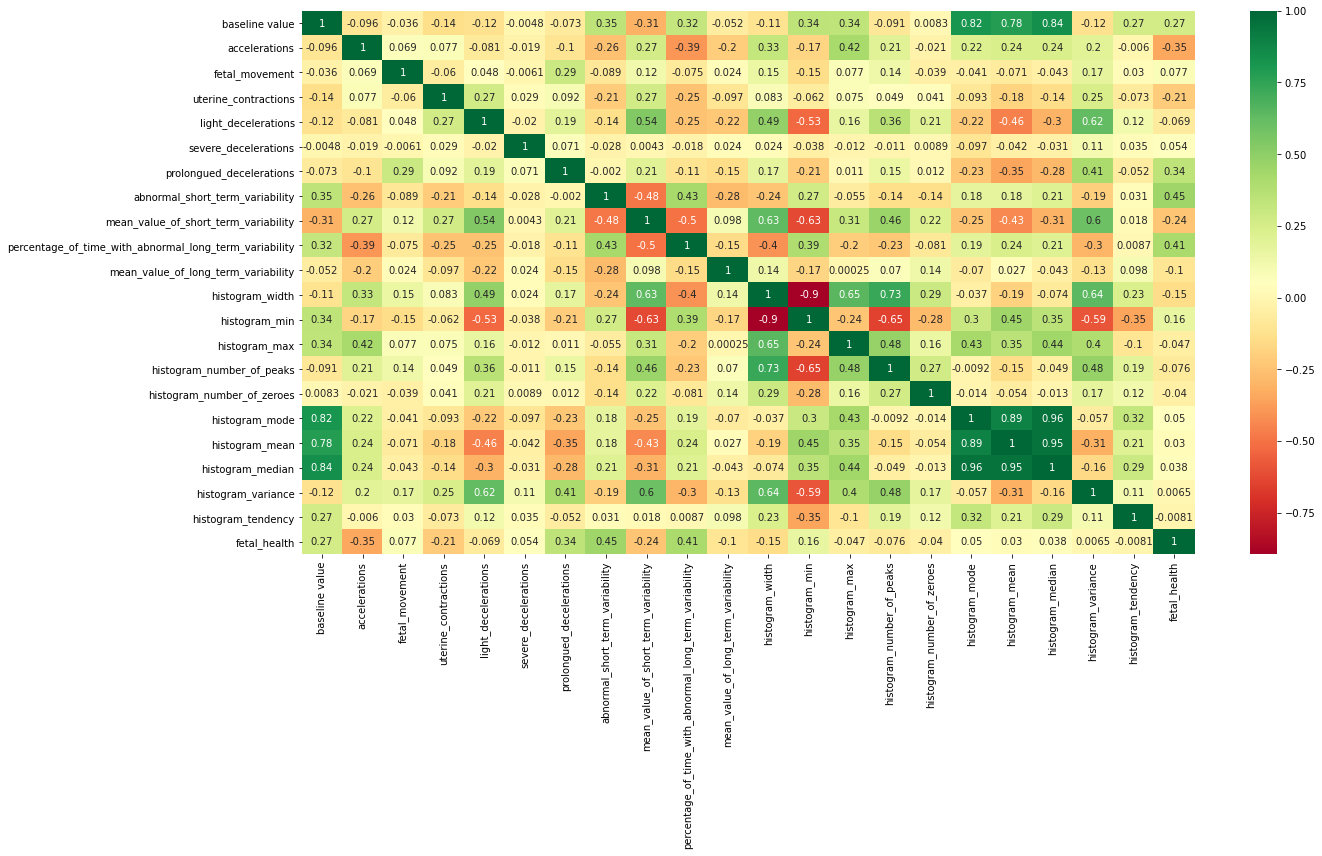

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g = sns.heatmap(df[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

Balancing Dataset:

In [13]:
df.fetal_health.value_counts()

1.0    1601
2.0     283
3.0      60
Name: fetal_health, dtype: int64

In [14]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1601,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled, df_3_upsampled])
 
# Display new class counts
df_upsampled.fetal_health.value_counts()

3.0    1601
2.0    1601
1.0    1601
Name: fetal_health, dtype: int64

Separating Fetures and Target Variable

In [15]:
x = df_upsampled.drop('fetal_health', axis = 1)
y = df_upsampled['fetal_health'] 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

Feature Scaling: Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
# Models I am going to use are: 
# XGBoost
# AdaBoost
# CataBoost
# RandomForest
# LBGM Classifier
# Voting Classifier

### Evaluator Function: 
Accuracy, Precision, Recall, f1-Score, roc_auc_score and Confusion Matrix

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    # Accuracy:
    print('Accuracy is: ', accuracy_score(y_test,y_pred))
    print('')
    # Classification Report:
    print('Classification Report: \n',classification_report(y_test,y_pred))

    # Area Under The Curve Score:

    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')

    print('Confusion Matrix: \n\n')
    plt.style.use("ggplot")
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(8,6),show_normed=True)

Building Model:

# XGBOOST

In [20]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy is:  0.9866777685262281

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       414
         2.0       0.96      1.00      0.98       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201

AUC_ROC Score:  0.9902296042989741 


Confusion Matrix: 




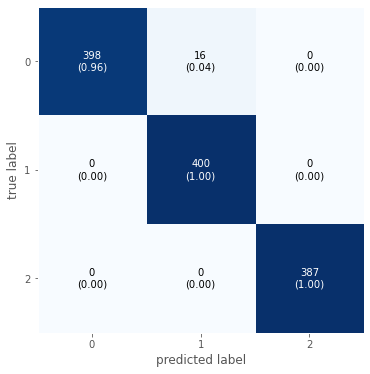

In [21]:
pred_xgb = xgb_classifier.predict(x_test)

evaluator(y_test, pred_xgb)

# AdaBoost:

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)

ada_classifier.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

Accuracy is:  0.8351373855120733

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.72      0.88      0.79       414
         2.0       0.85      0.76      0.80       400
         3.0       1.00      0.86      0.93       387

    accuracy                           0.84      1201
   macro avg       0.85      0.83      0.84      1201
weighted avg       0.85      0.84      0.84      1201

AUC_ROC Score:  0.8757241179596811 


Confusion Matrix: 




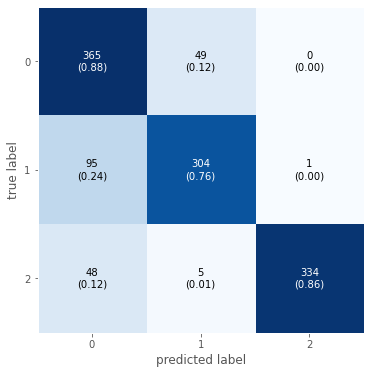

In [23]:
pred_ada = ada_classifier.predict(x_test)

evaluator(y_test, pred_ada)

# CatBoost:

In [24]:
from catboost import CatBoostClassifier

cat_classifier = CatBoostClassifier(iterations=1000, verbose = 0)

cat_classifier.fit(x_train, y_train)

Accuracy is:  0.9850124895920067

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       414
         2.0       0.96      1.00      0.98       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201

AUC_ROC Score:  0.9890083048363459 


Confusion Matrix: 




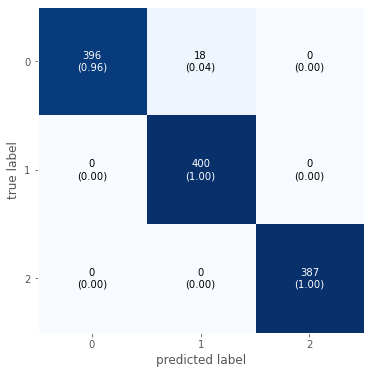

In [25]:
pred_cat = cat_classifier.predict(x_test)

evaluator(y_test, pred_cat)

# LBGM Classifier:

In [26]:
from lightgbm import LGBMClassifier

lgb_classifier = LGBMClassifier()
lgb_classifier.fit(x_train,y_train)

LGBMClassifier()

Accuracy is:  0.9908409658617818

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.97      0.99       414
         2.0       0.97      1.00      0.99       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201

AUC_ROC Score:  0.9932828529555446 


Confusion Matrix: 




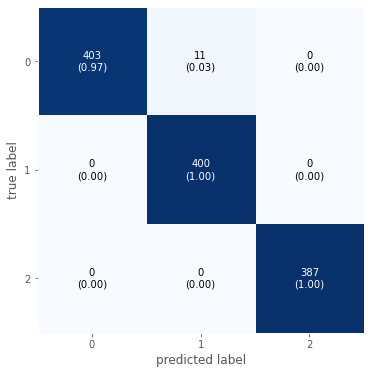

In [27]:
pred_lgb = lgb_classifier.predict(x_test)

evaluator(y_test,pred_lgb)

# Random Forest Classifier:

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

Accuracy is:  0.9791840133222315

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.99      0.94      0.97       414
         2.0       0.95      0.99      0.97       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201

AUC_ROC Score:  0.9846981735029434 


Confusion Matrix: 




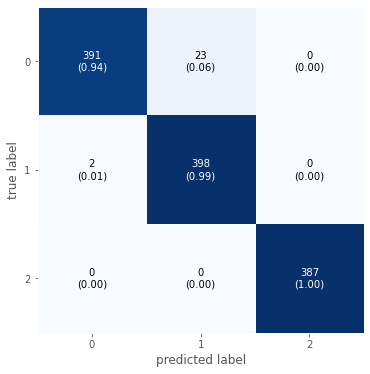

In [29]:
pred_rf = rf_classifier.predict(x_test)

evaluator(y_test, pred_rf)

Important Features

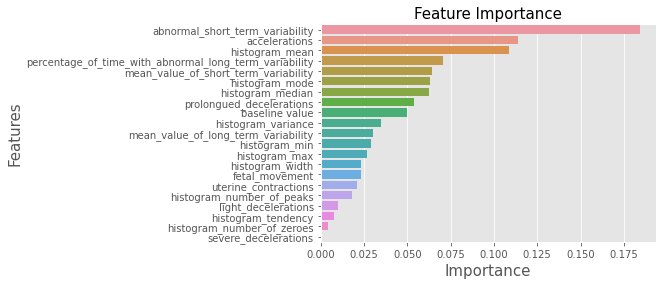

In [30]:
important_features = pd.DataFrame({'Features': x.columns, 
                                   'Importance': rf_classifier.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

# Voting Classifier:

In [31]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = [("xgb_classifier",xgb_classifier),('ada_classifier', ada_classifier),('cat _classifier', cat_classifier),("lgb_classifier",lgb_classifier),("rf_classifier",rf_classifier)],voting='soft')
vc.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:59:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb_classifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_...
                                            reg_lambda=1, scale_pos_weight=None,
                                            subsample=1, tree_method='exact',


Accuracy is:  0.9875104079933389

Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       414
         2.0       0.96      1.00      0.98       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201

AUC_ROC Score:  0.9908402540302882 


Confusion Matrix: 




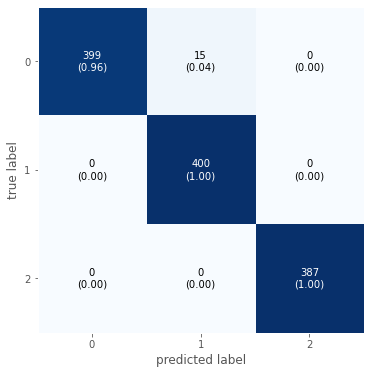

In [32]:
pred_vc = vc.predict(x_test)

evaluator(y_test, pred_vc)

## Result and Conclusion:
All models perform good except for adaboost (after balancing).

Accuracy has significantly increased by 4 to 5 percent after balancing out the data. To balance the data resampling was done by up_sampling i.e, duplicating the minority class to meet the value_count of majority class.

Random Forest Classifier is performing the best based on the evaluation matrices used.

---
### **Thank You**
---

Author: Avinash Vinayak Bagul
(MSc Artificial Intelligence)